<a href="https://colab.research.google.com/github/FlorDGM13/DA_BEGINNER_1/blob/main/DA_BEGINNER_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. LIBRERIAS

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

## 2. SERIES

In [ ]:
#series de pandas
numeros = [3, 4, 5, 6, 7]
numeros, type(numeros)

([3, 4, 5, 6, 7], list)

In [ ]:
serie = pd.Series(numeros)
serie, type(serie)

(0    3
 1    4
 2    5
 3    6
 4    7
 dtype: int64,
 pandas.core.series.Series)

##3. DATAFRAME

Una data frame es un conjunto bidimensional de datos, compuesto por filas y columnas, un data frame es un conjunto de series

In [ ]:
#Crear un data frame
#diccionario
data = {
    "Nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis"],
    "Edad": [22, 25, 28, 23, 20],
    "Ciudad": ["Barcelona", "Madrid", "Valencia", "Sevilla", "Bilboa"]
}
data, type(data)

({'Nombre': ['Ana', 'Juan', 'Pedro', 'Maria', 'Luis'],
  'Edad': [22, 25, 28, 23, 20],
  'Ciudad': ['Barcelona', 'Madrid', 'Valencia', 'Sevilla', 'Bilboa']},
 dict)

In [ ]:
#Generar un data frame
df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,25,Madrid
2,Pedro,28,Valencia
3,Maria,23,Sevilla
4,Luis,20,Bilboa


3.1. IMPORTAR U EXPORTAR DATAFRAME

In [ ]:
#exportar dataframe
df.to_csv("data.csv")

In [ ]:
#importar un dataframe
import_df = pd.read_csv("data.csv", index_col=0)
#el index: toma como referencia una columna asi no se genera una extra

import_df

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,25,Madrid
2,Pedro,28,Valencia
3,Maria,23,Sevilla
4,Luis,20,Bilboa


##4. SELECCIONAR DATOS

In [ ]:
#seleccionar columna
nombres = df["Nombre"]
print(nombres, type(nombres))

0      Ana
1     Juan
2    Pedro
3    Maria
4     Luis
Name: Nombre, dtype: object <class 'pandas.core.series.Series'>


In [ ]:
#sleccionar una columna
df["Nombre"]

,Nombre
0,Ana
1,Juan
2,Pedro
3,Maria
4,Luis


In [ ]:
#Seleccionar una o mas columnas
df [["Nombre","Edad"]]
# se usa doble [] por que estamos pasando ua lista

,Nombre,Edad
0,Ana,22
1,Juan,25
2,Pedro,28
3,Maria,23
4,Luis,20


##5.  FILTRADO DE DATOS

In [ ]:
#filtrar por indice
#LOC: selecciona los datos utilizando nombres de filas(etiquetas)
fila = df.loc[2]
fila

,2
Nombre,Pedro
Edad,28
Ciudad,Valencia


In [ ]:
#Filtrar por condicion
df[df["Edad"] > 23]

,Nombre,Edad,Ciudad
1,Juan,25,Madrid
2,Pedro,28,Valencia


In [ ]:
filtro = (df["Edad"]>23) & (df["Nombre"].str.startswith("P"))
df[filtro]
#startswith:metodo de pandas

,Nombre,Edad,Ciudad
2,Pedro,28,Valencia


In [ ]:
#filtrar  por query
df.query("Edad < 23")

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
4,Luis,20,Bilboa


In [ ]:
df[df["Nombre"].isin(["Ana", "Carlos", "Luis"])]
#isin:esta en

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
4,Luis,20,Bilboa


In [ ]:
def longitud_5(Nombre): #esta es una funcion
    return len(Nombre) == 5 #len: longuitud de la cadena
df[df["Nombre"].apply(longitud_5)]
#apply: aplicar

,Nombre,Edad,Ciudad
2,Pedro,28,Valencia
3,Maria,23,Sevilla


In [ ]:
#filtrar por condiciones multiples
df[df["Edad"].between(25,35)]

,Nombre,Edad,Ciudad
1,Juan,25,Madrid
2,Pedro,28,Valencia


## 6. TRATAMIENTO DE DATOS

In [ ]:
data = {
    "Nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis"],
    "Edad": [22, 25, np.nan, 23, 20],
    "Ciudad": ["Barcelona", "Madrid", "Valencia", None, "Bilboa"]
}
df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilboa


In [ ]:
#TRABAJAR CON LOS MISSING VALUES
#RELLENAR VALORES
#.mean:promedio
#fillna:completa valores faltantes
df_fill = df.fillna(
    {
        "Edad": df["Edad"].mean(),
        "Ciudad": "Desconocido"
    }
)
df_fill


,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,22.5,Valencia
3,Maria,23.0,Desconocido
4,Luis,20.0,Bilboa


In [ ]:
#ELIMINAR FILAS CON VALORES FALTANTES
df_sin_nan = df.dropna()
df_sin_nan
#dropna:elimina los valores filas

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
4,Luis,20.0,Bilboa


In [ ]:
#REEMPLAZAR VALORES ESPECIFICOS DE COLUMNA
df_reem = df.replace(
    {
        "Ciudad": {None: "Descnococido"},
        #          {nulos: "remplazar por"}
        "Edad": {np.nan: "Desconocido"}
    }
)
df_reem
#replae:remplaza valores

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,Desconocido,Valencia
3,Maria,23.0,Descnococido
4,Luis,20.0,Bilboa


## 7. INTERPOLAR VALORES

In [ ]:
#INTERPOLAR VALORES
df_interpolado = df.copy()
df_interpolado["Edad"] = df["Edad"].interpolate()
df_interpolado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,24.0,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilboa


## 8. VALORES DUPLICADOS

In [ ]:
#VALORES DUPLICADOS
data_duplicados = {
    "Nombre": ['Ana', 'Juan', 'Pedro', 'Maria', 'Luis', 'Ana', 'Juan'],
    'Edad': [22, 25, np.nan, 23, 20, 22, 25],
    'Ciudad': ['Barcelona', 'Madrid', 'Valencia', None, 'Bilbao', 'Barcelona', 'Madrid']
}

df_duplicado =pd.DataFrame(data_duplicados)
df_duplicado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao
5,Ana,22.0,Barcelona
6,Juan,25.0,Madrid


In [ ]:
df_sin_duplicado = df_duplicado.drop_duplicates()
df_sin_duplicado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao


## 9. RENOMBRAR

In [ ]:
df_renombrado = df.rename(columns={"Nombre": "Name", "Edad":'Age', "Ciudad": 'City'})
df_renombrado

,Name,Age,City
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilboa


##10. ORDENAR

In [ ]:
#ORDENAR
columns_ordenadas = ['Ciudad','Edad', 'Nombre']
df_ordenado = df[columns_ordenadas]
df_ordenado

,Ciudad,Edad,Nombre
0,Barcelona,22.0,Ana
1,Madrid,25.0,Juan
2,Valencia,NaN,Pedro
3,None,23.0,Maria
4,Bilboa,20.0,Luis


## 11. TRANSFORMAR DATOS

In [ ]:
#TRANSFORMACION DE DATOS
def cuadrado(x):
    return x**2

df['Edad_cuadrado'] = df['Edad'].apply(cuadrado)
df

,Nombre,Edad,Ciudad,Edad_cuadrado
0,Ana,22.0,Barcelona,484.0
1,Juan,25.0,Madrid,625.0
2,Pedro,NaN,Valencia,NaN
3,Maria,23.0,None,529.0
4,Luis,20.0,Bilboa,400.0


##12. AGRUPACION DE DATOS

 implica organisarlos en grupos basados en ciertos aributos, pandas proporcion al meo group by

In [ ]:
#AGRUPACION DE DATOS
data = {
    'Nombre': ['Juan', 'Ana', 'Luis', 'Laura', 'Pedro', 'Carla'],
    'Ciudad': ['Madrid', 'Barcelona', 'Madrid', ' Valencia', 'Barcelona', 'Madrid'],
    'Edad': [25, 33, 30, 28, 45, 38],
    'Puntuacion': [80, 90, 85, 88, 75, 91]
}
df = pd.DataFrame(data)
df

,Nombre,Ciudad,Edad,Puntuacion
0,Juan,Madrid,25,80
1,Ana,Barcelona,33,90
2,Luis,Madrid,30,85
3,Laura,Valencia,28,88
4,Pedro,Barcelona,45,75
5,Carla,Madrid,38,91


In [ ]:
#AGRUPAR DATOS POR CIUDAD
grouped = df.groupby('Ciudad')
print(grouped.groups)

{' Valencia': [3], 'Barcelona': [1, 4], 'Madrid': [0, 2, 5]}


7) FUNCIONES DE AGREGACION INCORPORADAS

Es el proceso de agregar multiples datos en una sola fila aplicando una funcion de agregacion (suma,promedio,minimo, maximo, etc)

In [ ]:
#CALCULAR LA SUMA DE LAS EDADES Y PUNTUACIONES POR CIUDAD
#agg:permite introducir diccionario y decir lo que hacer con cada variable
#grouped: te permite dividir un DataFrame en grupos basados en una o más columnas y aplicar funciones a cada grupo de manera individual
aggregated_data = grouped.agg(
    {
        'Edad':'mean',
        'Puntuacion': 'sum'
    }
)
aggregated_data

,Edad,Puntuacion
Ciudad,,
Valencia,28.0,88
Barcelona,39.0,165
Madrid,31.0,256


##13. FUNCIONES DE AGREGACION PERSONALIZADAS

In [ ]:
def  rango(series):
    return series.max() - series.min()

#APLICAR LA FUNCION AGREGADA AL GRUPO

aggregated_data_Custom =grouped.agg(
    {
       'Edad': rango,
       'Puntuacion': rango
    }
)
aggregated_data_Custom

,Edad,Puntuacion
Ciudad,,
Valencia,0,0
Barcelona,12,15
Madrid,13,11


##14. AGRUPACION MULTINIVEL

In [ ]:
data ["Categoria"] = ['A', 'B', 'A', 'B', 'A', 'B']
df = pd.DataFrame(data)
df

,Nombre,Ciudad,Edad,Puntuacion,Categoria
0,Juan,Madrid,25,80,A
1,Ana,Barcelona,33,90,B
2,Luis,Madrid,30,85,A
3,Laura,Valencia,28,88,B
4,Pedro,Barcelona,45,75,A
5,Carla,Madrid,38,91,B


In [ ]:
#AGRUPACION MULTINIVEL
#Agrupar datos por ciudad y categoria
grouped_multi = df.groupby(["Ciudad", "Categoria"])
grouped_multi.groups

{(' Valencia', 'B'): [3], ('Barcelona', 'A'): [4], ('Barcelona', 'B'): [1], ('Madrid', 'A'): [0, 2], ('Madrid', 'B'): [5]}

In [ ]:
#Calcular la suma de las edades y puntuacion por ciudad y por categoria
aggregated_data_multi = grouped_multi.agg(
    {
        'Edad': "sum",
        'Puntuacion': "mean"
    }
)
aggregated_data_multi

Edad  Puntuacion
Ciudad    Categoria                  
 Valencia B            28        88.0
Barcelona A            45        75.0
          B            33        90.0
Madrid    A            55        82.5
          B            38        91.0

##15. AGREGAR DATOS A UN DATAFRAME


In [ ]:
data = {'Nombre': ['Juan', 'Ana', 'Luis', 'Laura'],
        'Edad': [25, 33, 30, 28]}
df =pd.DataFrame(data)
df

,Nombre,Edad
0,Juan,25
1,Ana,33
2,Luis,30
3,Laura,28


In [ ]:
#Agregar columna
df['Ciudad'] = ['Madrid', 'Barcelona', 'Madrid', 'Valencia']
df

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia


In [ ]:
#Generar una fila
new_row = pd.Series({'Nombre': "Pedro", 'Edad': 45, 'Ciudad': "Barcelona",})

#Agregamos nueva fila - concat
df = pd.concat([df, new_row.to_frame().T], ignore_index=True)
# nombre variable =pd.concat([dataframe,nueva fila.to_Frame().T])
df
#to_frame:convierte la serie de pandas a un dataframe
#.t: se usa por que en el ejempo es un vector columna lo pasamos a fila
#ignore_index:para no repetir indices

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia
4,Pedro,45,Barcelona


##16. UNIR DATAFRAME

In [ ]:
#DATAFRAME 1

data = {
    'Nombre': ['Juan', 'Ana', 'Luis', 'Laura'],
    'Edad': [25, 33, 30, 28],
    'Ciudad': ['Madrid', 'Barcelona', 'Madrid', 'Valencia']
}
df = pd.DataFrame(data)
#DATAFRAME 2

data2 = {
    'Nombre': ['Carla', 'Irene'],
    'Edad': [38, 27],
    'Ciudad': ['Madrid', 'Bilbao']
}
df2 = pd.DataFrame(data2)

In [ ]:
df

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia


In [ ]:
df2

,Nombre,Edad,Ciudad
0,Carla,38,Madrid
1,Irene,27,Bilbao


In [ ]:
#combinar dataframes
df_combined = pd.concat([df,df2],ignore_index=True)
df_combined

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia
4,Carla,38,Madrid
5,Irene,27,Bilbao


##17. NUMPY

In [ ]:
#ARRAYS
#Crear un arrfelo de 1 dimension con 5 elementos
arr1 = np.array([1,2,3,4,5,6])
print("arreglo 1D:", arr1)
print("formas(shape)", arr1.shape)
print("Tipo de datps (type)", arr1.dtype)


arreglo 1D: [1 2 3 4 5 6]
formas(shape) (6,)
Tipo de datps (type) int64


##18. MATRIZ

In [ ]:
arr2 = arr1.reshape((2,3))
print("arreglo 2D:", arr2)
print("formas(shape)", arr2.shape)
print("Tipo de datps (type)", arr2.dtype)

arreglo 2D: [[1 2 3]
 [4 5 6]]
formas(shape) (2, 3)
Tipo de datps (type) int64


In [ ]:
#crear una matriz con forma (4,4) con numeros aleatorios entre 0 y 1
matrix = np.random.rand(4,4)
print("Arreglo 2D:\n", matrix)
print("Forma (shape):", matrix.shape)
print("Tipo de datos (dtype):", matrix.dtype)
print("Tipo de datos(dtype)", matrix.dtype)

Arreglo 2D:
 [[0.69092549 0.72119179 0.13943448 0.10502673]
 [0.94700714 0.87102962 0.7482805  0.083469  ]
 [0.13262642 0.45392868 0.34788243 0.86629043]
 [0.96263027 0.70475049 0.82454065 0.50136012]]
Forma (shape): (4, 4)
Tipo de datos (dtype): float64
Tipo de datos(dtype) float64


##19. NUMPY: MANIPULACION DE DATOS

In [ ]:
#Crear una arreglo de 2 dim a partir de una lista de listas
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
#crear una rreglo de ceros con una forma (3,4)
arr = np.zeros((3,4))
print(arr)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
#crear un arreglo de unos con formar (2,2)
arr =np.ones((2,2))
print(arr)

[[1. 1.]
 [1. 1.]]


In [ ]:
arr[1,1] = 10
print(arr)

[[ 1.  1.]
 [ 1. 10.]]


In [ ]:
#Crear una matriz identidad
#matriz identidad: es una matriz con el mismo numero de filas y columnas
arr = np.eye(8)
print(arr)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
#Crear un arreglo 3D de ceros con fomra (2,3,4)
arr = np.zeros((2,3,4))
#             (dimension,filas,columnas)
print(arr)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [ ]:
arr[0,1,2] = 13
arr

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0., 13.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])

In [ ]:
arr = np.random.rand(2,5)
arr

array([[0.29502169, 0.11163561, 0.72981535, 0.72297898, 0.97380055],
       [0.93697276, 0.84125916, 0.48679312, 0.10052569, 0.91167519]])

In [ ]:
arr.T

array([[0.29502169, 0.93697276],
       [0.11163561, 0.84125916],
       [0.72981535, 0.48679312],
       [0.72297898, 0.10052569],
       [0.97380055, 0.91167519]])

In [ ]:
arr1 =np.array([[1,2],[3,4]])
arr2 = np.array([[5,6],[7,8]])
arr1, arr2

(array([[1, 2],
        [3, 4]]),
 array([[5, 6],
        [7, 8]]))

In [ ]:
#concatenar horizontalmente
arr_h = np.hstack((arr1, arr2))
arr_h

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [ ]:
#concatenar verticarlmente
arr_v = np.vstack((arr1, arr2))
arr_v

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

##20. OPERACIONES MATEMATICAS Y ESTADISTICAS


In [ ]:
#Calcular la suma de los elementos
arr = np.array([1,2,3,4,5])
arr


array([1, 2, 3, 4, 5])

In [ ]:
suma = np.sum(arr)
suma

15

In [ ]:
#calcular promedio
promedio= np.mean(arr)
promedio

3.0

In [ ]:
#Calcular la mediana
mediana = np.median(arr)
mediana

3.0

In [ ]:
#Calcular el producto
producto = np.prod(arr)
producto

120

In [ ]:
#Calcular la desviacion standar
desviacion_standar = np.std(arr)
desviacion_standar

1.4142135623730951

In [ ]:
#Calcular la varianzia
varianza = np.var(arr)
varianza

2.0

In [ ]:
#calcular el minimo
minimo = np.min(arr)
minimo

1

In [ ]:
#calcular el maximo
maximo = np.max(arr)
maximo

5

In [ ]:
#Calcular la suma acumulativa
suma_acumulativa = np.cumsum(arr)
suma_acumulativa

array([ 1,  3,  6, 10, 15])

OPERACIONES VECTORIALES

In [ ]:
#SUMA ELEMENTO A ELEMENTO
arr + arr

array([ 2,  4,  6,  8, 10])

In [ ]:
#resta
arr -arr

array([0, 0, 0, 0, 0])

In [ ]:
#multiplicacion
arr * arr

array([ 1,  4,  9, 16, 25])

In [ ]:
#dividion
arr / arr

array([1., 1., 1., 1., 1.])

##21. INTEGRACION DE PANDAS Y NUMPY

In [ ]:
data = np.array([[1,2,3],[4,5,6],[7,8,9]])
df = pd.DataFrame(data, columns=['A', 'B', 'C'])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
data = {
    'A': [1,4,7],
    'B': [2,5,8],
    'C': [3,6,9]
}
df = pd.DataFrame(data)
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
#convertir un dataframe a un array de numpy
arr = df.to_numpy()
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
df.values

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
#Calcular el promediode cada columna utilizando munpy
meanColumns = np.mean(df, axis=0)
meanColumns

,0
A,4.0
B,5.0
C,6.0


In [ ]:
df.mean(axis=0)
#axis le dice a pandas en que direccion ejecutara
# 1= fila, 0=columnas

,0
A,4.0
B,5.0
C,6.0


##22. INTRODUCCIÓN MATPLOTLIB


In [ ]:
#IMPORTAR LIBRERIA
import matplotlib.pyplot as plt

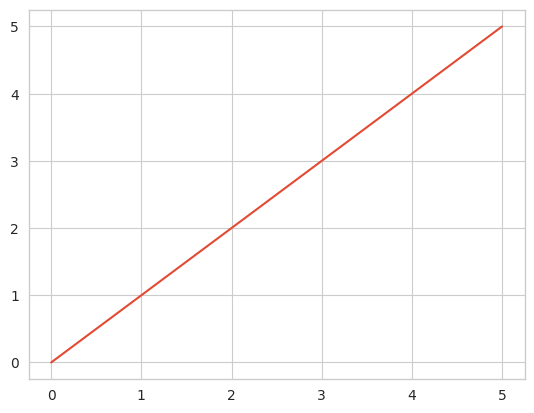

In [ ]:
#ejemplo de una linea simple

x = [0,1,2,3,4,5]
y = [0,1,2,3,4,5]

plt.plot(x,y)
plt.show()

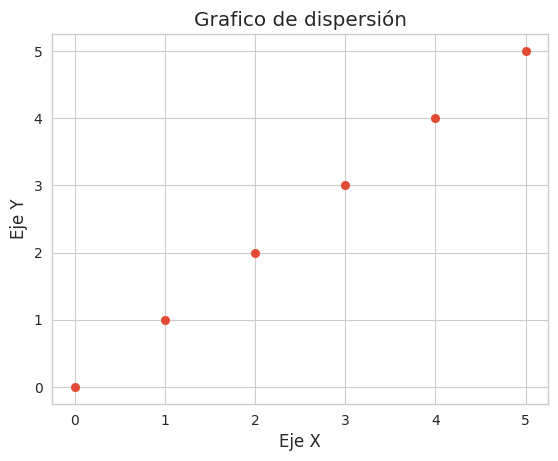

In [ ]:
plt.scatter(x,y)
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Grafico de dispersión")
plt.show()


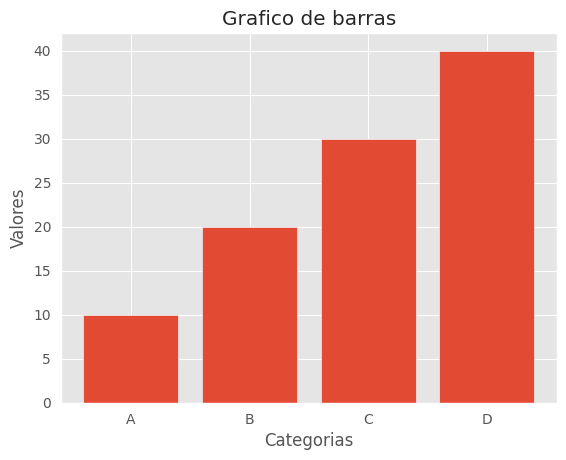

In [ ]:
#grafico de barras
categorias = ["A", "B", "C", "D"]
valores = [10, 20, 30, 40]
plt.style.use("ggplot")
plt.bar(categorias, valores)
#           x,        y
plt.xlabel("Categorias")
plt.ylabel("Valores")
plt.title("Grafico de barras")
plt.show()


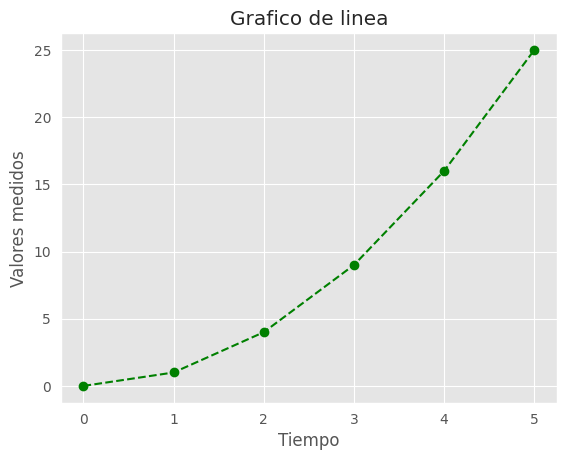

In [ ]:
x = [0,1,2,3,4,5]
y = [0,1,4,9,16,25]
plt.plot(x,y, color="green", linestyle="--", marker="o")
plt.xlabel("Tiempo")
plt.ylabel("Valores medidos")
plt.title("Grafico de linea")
plt.show()

##23. INTRODUCCION A SEABORN

In [ ]:
#GRAFICO DE DISPERSION
import seaborn as sns
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data, set (data["species"])

(     sepal_length  sepal_width  petal_length  petal_width    species
 0             5.1          3.5           1.4          0.2     setosa
 1             4.9          3.0           1.4          0.2     setosa
 2             4.7          3.2           1.3          0.2     setosa
 3             4.6          3.1           1.5          0.2     setosa
 4             5.0          3.6           1.4          0.2     setosa
 ..            ...          ...           ...          ...        ...
 145           6.7          3.0           5.2          2.3  virginica
 146           6.3          2.5           5.0          1.9  virginica
 147           6.5          3.0           5.2          2.0  virginica
 148           6.2          3.4           5.4          2.3  virginica
 149           5.9          3.0           5.1          1.8  virginica
 
 [150 rows x 5 columns],
 {'setosa', 'versicolor', 'virginica'})

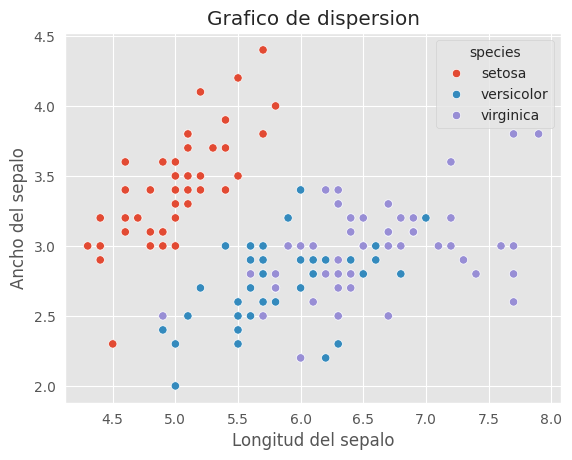

In [ ]:
#grafico de dispersion
sns.scatterplot(data=data, x="sepal_length", y="sepal_width", hue="species")
plt.xlabel("Longitud del sepalo")
plt.ylabel("Ancho del sepalo")
plt.title("Grafico de dispersion")
plt.show()

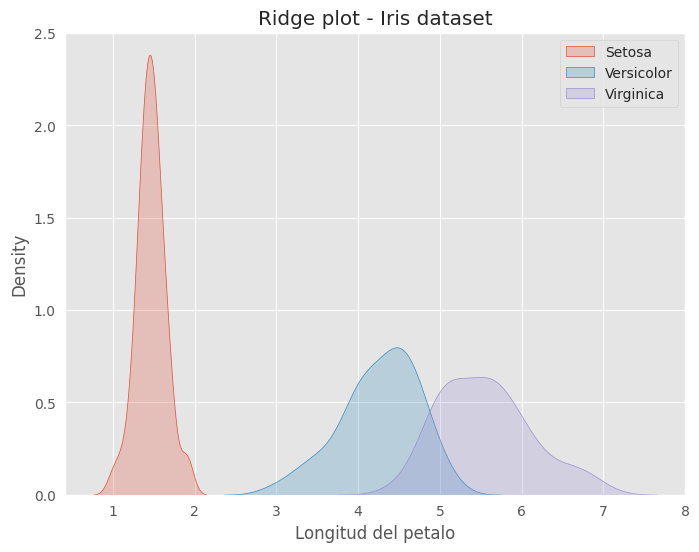

In [ ]:
#GRÁFICA DE RIDGEPLOT
setosa = data[data["species"] == "setosa"]
versicolor = data[data["species"] == "versicolor"]
virginica = data[data["species"] == "virginica"]

#crea una figura donde puedes insertar dfierentes cosas
#configuramas la figura y los ejes
fig, ax= plt.subplots(figsize=(8,6))
plt.xlabel("Longitud del petalo")

#Crear el ridgeplot
sns.kdeplot(data=setosa["petal_length"], label="Setosa", ax=ax, fill=True)
sns.kdeplot(data=versicolor["petal_length"], label="Versicolor", ax=ax, fill=True)
sns.kdeplot(data=virginica["petal_length"], label="Virginica", ax=ax, fill=True)

#ajustamos la posicion de las leyendas
ax.legend(loc="upper right")
plt.title("Ridge plot - Iris dataset")
plt.show()

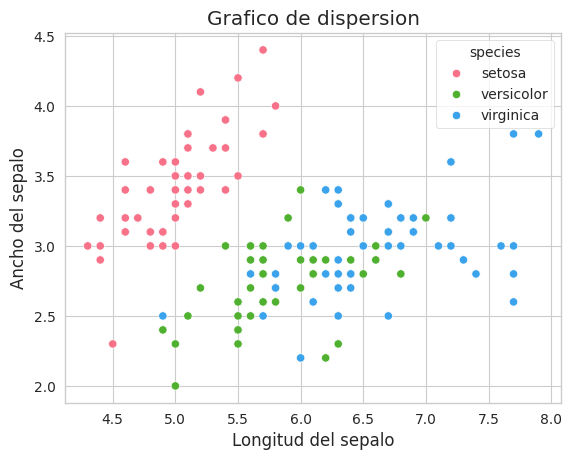

In [ ]:
#GRÁFICO DE DISPERSIONS
sns.set_style("whitegrid")
palette = sns.color_palette("husl",3)
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species",data=data, palette=palette)
plt.xlabel("Longitud del sepalo")
plt.ylabel("Ancho del sepalo")
plt.title("Grafico de dispersion")
plt.show()

In [ ]:
#GENERAR DATOS DE EJEMPLO
np.random.seed(42)
edad_autos =np.random.randint(0,20, size=200)
precio_autos = 30 - edad_autos + np.random.normal(-3,3, size=200)
data = pd.DataFrame({
    "edad": edad_autos,
    "precio": precio_autos})
data

,edad,precio
0,6,23.662535
1,19,9.816449
2,14,10.839106
3,10,16.190199
4,7,19.569613
...,...,...
195,15,12.807953
196,2,30.441000
197,19,9.213749
198,3,24.270218


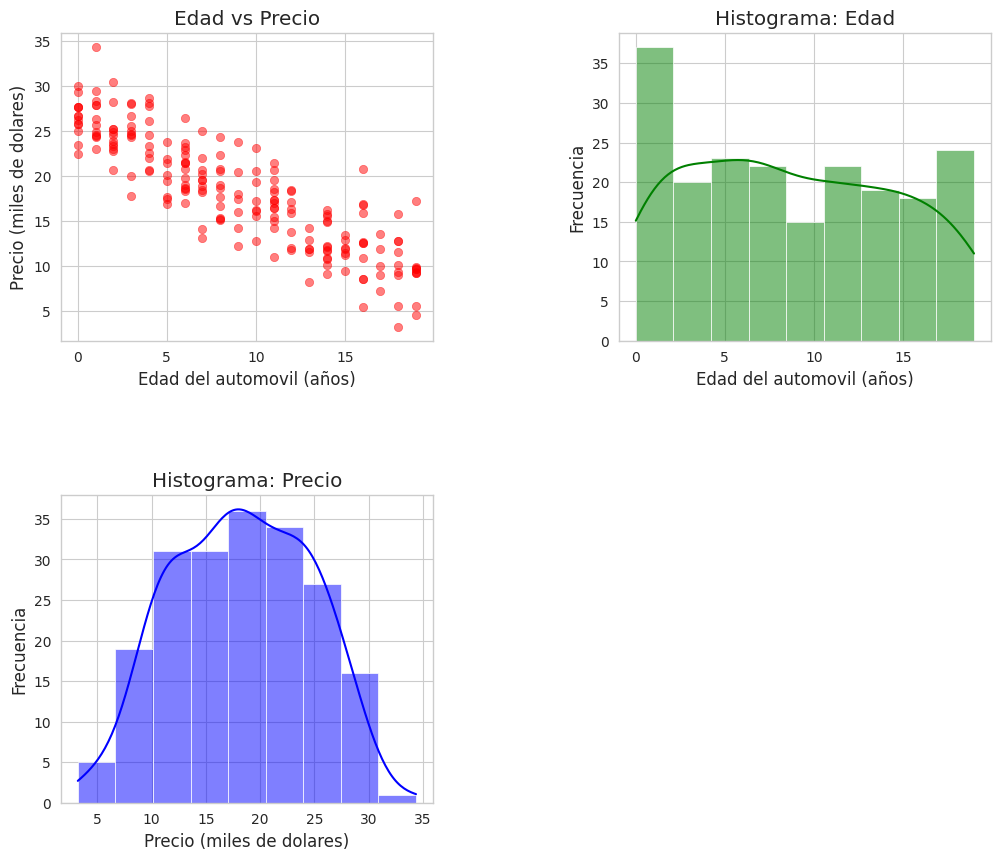

In [ ]:
#Creación del g´rafico
fig, ax= plt.subplots(2,2, figsize=(12,10))

#Gräfico de dispersion -(0,0)

ax[0,0].scatter(data["edad"], data["precio"], color="red", alpha=0.5)
ax[0,0].set_xlabel("Edad del automovil (años)")
ax[0,0].set_ylabel("Precio (miles de dolares)")
ax[0,0].set_title("Edad vs Precio")

#histograma de la edad - (0,1)
sns.histplot(data["edad"], ax=ax[0,1], color="g", kde=True)
ax[0,1].set_xlabel("Edad del automovil (años)")
ax[0,1].set_ylabel("Frecuencia")
ax[0,1].set_title("Histograma: Edad")
#kde:grafica la ojiva de la distribución

#histograma del precio - (1,0)
sns.histplot(data["precio"], ax=ax[1,0], color="b", kde=True)
ax[1,0].set_xlabel("Precio (miles de dolares)")
ax[1,0].set_ylabel("Frecuencia")
ax[1,0].set_title("Histograma: Precio")

#histograma - (1,1)
#eliminar
ax[1,1].axis("off")

#Ajustar gráficas
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()